# TalentMind1 project
Loop academy - datascience project

# import libs and load dataset

In [1]:
# connect drive to colab
from google.colab import drive
drive.mount('content/')
%cd /content/content/MyDrive/Colab_Notebooks

Mounted at content/
/content/content/MyDrive/Colab_Notebooks


# download dataset from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle

In [ ]:
# original immo dataset

!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

 96% 89.0M/93.0M [00:00<00:00, 127MB/s]
100% 93.0M/93.0M [00:00<00:00, 116MB/s]


In [ ]:
!kaggle datasets download -d alisharifi2000/talentmindphase1

talentmindphase1.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip dataaset 
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
  inflating: immo_data.csv           


# import libraries

In [2]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
import sklearn.preprocessing as prep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
%ls

'abraham sedaghat (shohreh)_pg.pdf'
 ADP2305/
 apartment-rental-offers-in-germany.zip
 ASKModulator/
 AudioAmplifire/
 bufferdriver/
 checkpoint
 cwrnn.py
 DoubleBalanceMixer/
 Filter/
'Fraud detection project'/
 FrequencyDouber_sine/
 FrequencyDoubler_pulse/
 FSKModulator/
 GRU.ipynb
 Images/
 immo_data.csv
 Invereter/
 kaggle.json
 LSTM_FinalProject.ipynb
 LSTM_model/
 LSTM_model.data-00000-of-00001
 LSTM_model.index
 LSTM_S504.ipynb
 Multi-stageBuffer/
'multi stage buffer with transmission'/
 PWMmodulator/
 __pycache__/
 pyrenn.py
 pyrenn_TA.ipynb
 RNN.ipynb
 RNN_new.ipynb
 sn1126/
 SN1126Transmission/
 sn540/
 SquareWaveGenerator/
 talentmindphase1.zip
 TEST_MLP.ipynb
 TVRemote/
 unknown/


In [4]:
# load or reload daatset
try:
  del dataset
  gc.collect()
  print("previous dataset deleted")
except NameError:
  print("There was no privious version of dataset")
except Exception as err:
  print(type(err))
  print(err)

print("try to load dataset...")
try: 
  dataset = pd.read_csv('./immo_data.csv', lineterminator='\n') 
  print("load successfull")
except Exception as err:
  print("load unccesscfull.")
  print(err )

There was no privious version of dataset
try to load dataset...
load successfull


In [5]:
dataset.head(20)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
5,Schleswig_Holstein,142.00,gas_heating,NONE,NaN,False,True,5,4.48,2.4,...,Schleswig_Flensburg_Kreis,Struxdorf,NaN,"helle ebenerdige 2 Zi. Wohnung mit Terrasse, h...",NaN,NaN,NaN,NaN,NaN,Feb20
6,Sachsen,70.00,self_contained_central_heating,ONE_YEAR_FREE,10.0,False,False,9,1.01,2.4,...,Mittelsachsen_Kreis,Freiberg,Am Bahnhof 14 in Freiberg\nHeizkosten und Warm...,NaN,NaN,NaN,NaN,NaN,NaN,Feb20
7,Bremen,88.00,central_heating,ONE_YEAR_FREE,10.0,False,True,5,1.89,2.4,...,Bremen,St._Magnus,+ Komfortabler Bodenbelag: Die Wohnung ist zus...,Rollläden; Warmwasserbereiter; Kellerraum; Gas...,44.00,B,NaN,NaN,NaN,Feb20
8,Baden_Württemberg,110.00,oil_heating,ONE_YEAR_FREE,NaN,False,False,5,3.77,40.0,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",NaN,E,NaN,NaN,NaN,Feb20
9,Nordrhein_Westfalen,95.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19


# Dataset preparation

## describe dataset

In [6]:
dataset.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [8]:
dataset.duplicated().any()

False

## missing values

In [9]:
nulls = dataset.isna().sum()

In [10]:
# normalize features
nulls /= 268850


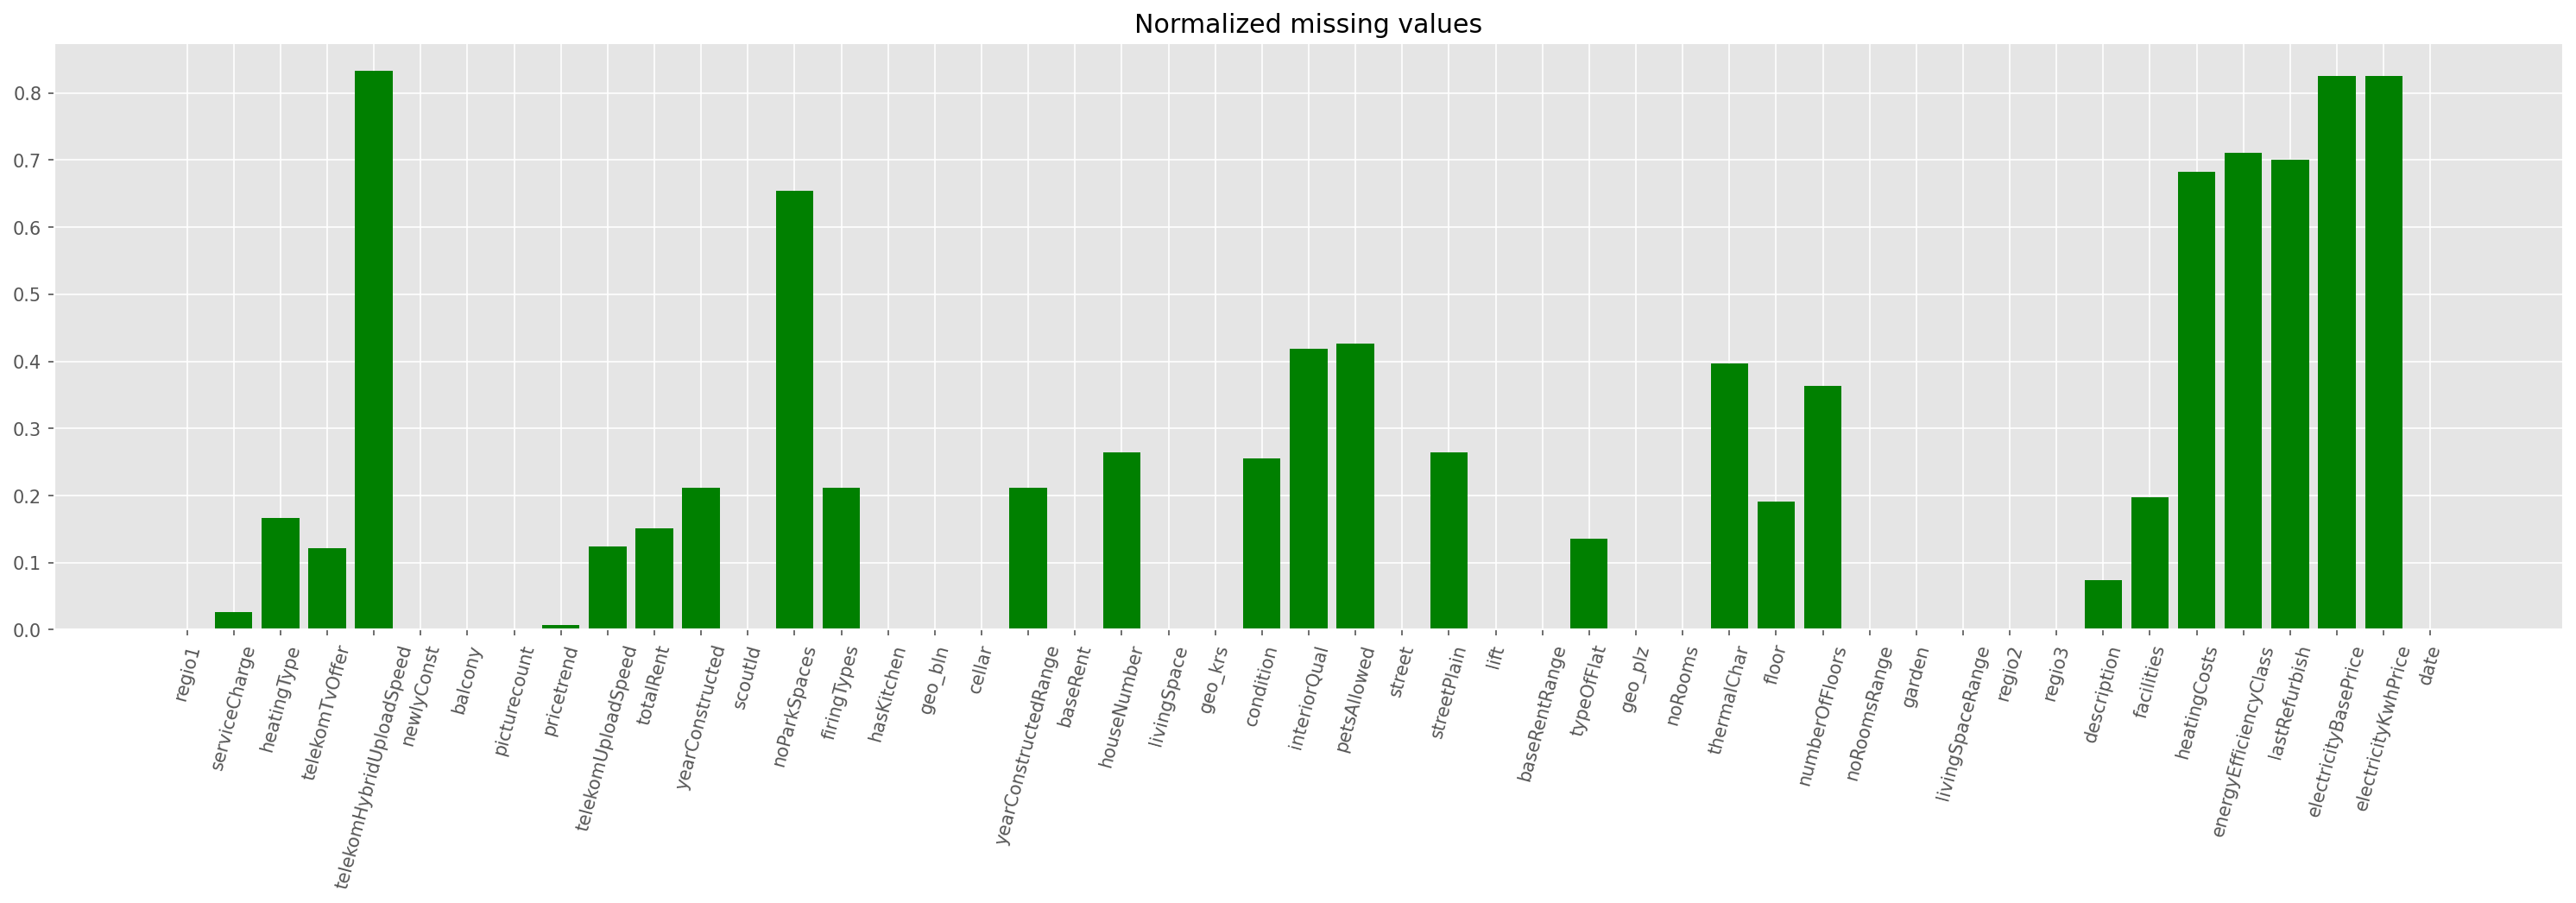

In [11]:
fig = plt.figure(figsize=(25,6),dpi=150)
plt.bar(nulls.index, nulls.values, color = "green")
plt.title('Normalized missing values')
plt.xticks(rotation=75)
plt.show()

In [12]:
unused = nulls[nulls>0.6] # data with 60% null vlaues

In [13]:
unused = list(unused.index)

In [14]:
dataset.drop(columns=unused, inplace=True)

## duplications

In [15]:
# find duplications
duplications = dataset.drop(columns=["scoutId"])

In [16]:
duplications.duplicated().sum()

900

In [17]:
# class counts
counts  = dataset['regio1'].value_counts()

In [18]:
counts

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

map of Germany
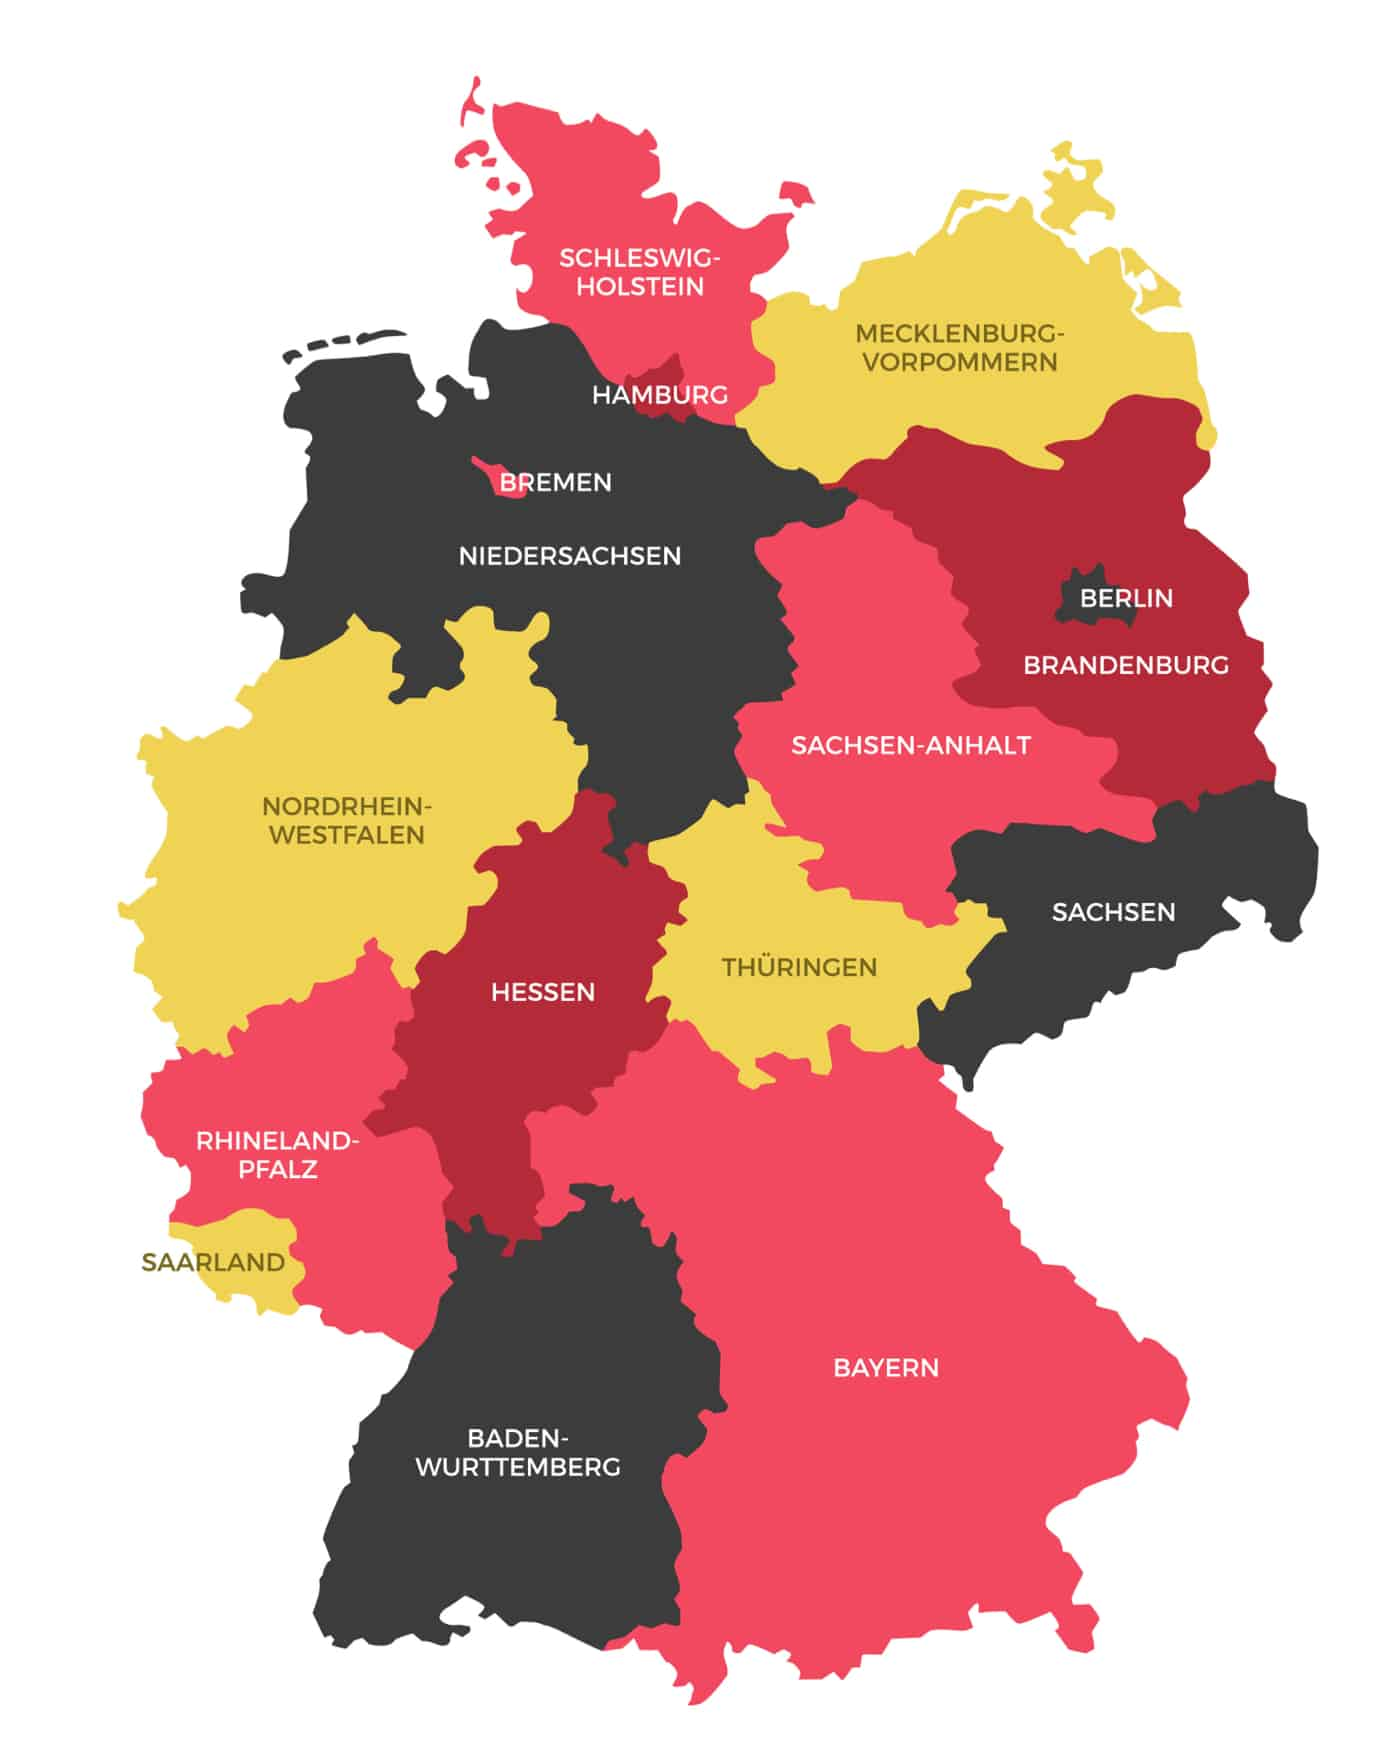

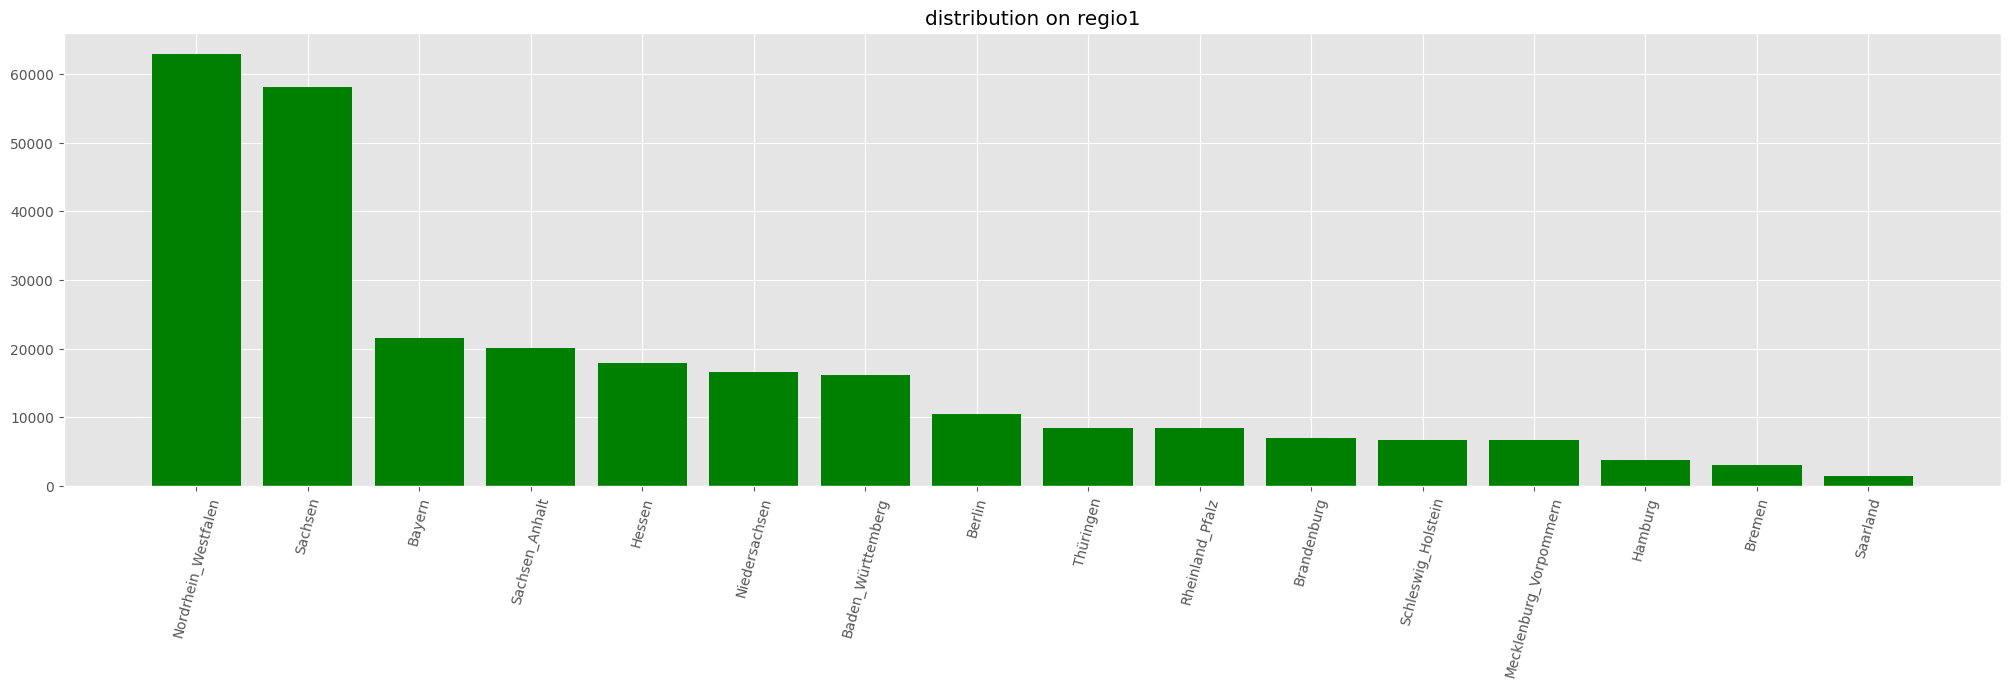

In [19]:
fig = plt.figure(figsize=(25,6),dpi=100)
plt.bar(counts.index, counts.values, color = "green")
plt.title('distribution on regio1')
plt.xticks(rotation=75)
plt.show()

## handle outliers

In [ ]:
# box plot
sns.boxplot(x="totalRent", y="baseRent", palette=["m", "g"],
            data=dataset)

In [ ]:
# drop non values
dataset.dropna(subset=['totalRent'], inplace=True)

In [ ]:
# remove outliers with mean and 3 sigma that keep 99% of data
dataset = dataset[dataset['totalRent']<6e+03]
dataset = dataset[dataset['totalRent']>150]

In [ ]:
dataset.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,223756.000000,227791.000000,226184.000000,199820.000000,227791.000000,178629.000000,2.277910e+05,178629.000000,227791.000000,227791.000000,227791.000000,227791.000000,227791.000000,134316.000000,187532.000000,148581.000000,227791.000000,227791.000000
mean,150.859110,9.865754,3.393972,28.931707,810.159469,1965.704768,1.068870e+08,3.685521,640.148265,73.558255,3.746860,36503.001023,2.617573,113.910573,2.131535,3.578540,2.555009,3.039914
std,325.097267,6.439022,2.000405,16.301277,524.549288,47.862302,1.251465e+07,2.729197,473.742454,274.012548,2.211939,27983.341584,1.724246,59.825286,3.555643,5.751532,0.933879,1.389030
min,0.000000,0.000000,-12.330000,1.000000,153.670000,1000.000000,2.887174e+07,1.000000,0.000000,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000
25%,95.562500,6.000000,1.960000,10.000000,470.000000,1940.000000,1.066345e+08,1.000000,335.000000,54.000000,2.000000,9120.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000
50%,135.960000,9.000000,3.390000,40.000000,650.000000,1972.000000,1.111416e+08,3.000000,490.000000,67.000000,3.000000,37520.000000,3.000000,106.000000,2.000000,3.000000,3.000000,3.000000
75%,190.000000,13.000000,4.600000,40.000000,984.000000,1996.000000,1.137655e+08,5.000000,795.000000,86.000000,5.000000,56073.000000,3.000000,139.000000,3.000000,4.000000,3.000000,4.000000
max,146118.000000,112.000000,14.920000,100.000000,5995.000000,2090.000000,1.157117e+08,9.000000,30990.000000,111111.000000,9.000000,99998.000000,560.000000,1983.000000,999.000000,999.000000,5.000000,7.000000


#Feature Study

In [62]:
# plot distribution function
def plot_distribiution(data_frame, feature:str)-> None:
  """plot distribution of a feature
  
  data_frame (pd.DataFrame) : pandas dataframe needs to select
  feature (str): name of the feature needs to 
  """
  if isinstance(data_frame, pd.DataFrame):
    data = data_frame.get(feature)
  else:
    data = data_frame
  
  ax = sns.displot(data, kde = True, height=8.27, aspect=11.7/8.27)
  plt.title(f"{feature} distribution")


## base rent 
analyse for base rent prices

In [23]:
base_rent = dataset['baseRent']

In [24]:
# is there any null value
base_rent_nulls =  base_rent.isna()
base_rent_nulls.sum()


0

In [25]:
base_rent

0         595.0
1         800.0
2         965.0
3         343.0
4         765.0
          ...  
268845    820.0
268846    930.0
268847    650.0
268848    840.0
268849    935.0
Name: baseRent, Length: 268850, dtype: float64

In [26]:
base_rent.describe()

count    2.688500e+05
mean     6.941294e+02
std      1.953602e+04
min      0.000000e+00
25%      3.380000e+02
50%      4.900000e+02
75%      7.990000e+02
max      9.999999e+06
Name: baseRent, dtype: float64

In [54]:
base_rent = base_rent[base_rent <1.2e+3] # by  IQR outliers of baserent calculated

In [ ]:
plt.figure(figsize=(10,7), dpi= 80)
plt.stem(base_rent, use_line_collection = True)
plt.show()

In [ ]:
plot_distribiution(base_rent,"baseRent")

In [ ]:
sns.boxplot(data=base_rent)

## living space

In [87]:
living_space = dataset['livingSpace']

In [88]:
living_space

0          86.00
1          89.00
2          83.80
3          58.15
4          84.97
           ...  
268845     90.00
268846    115.00
268847     95.00
268848     70.00
268849     77.00
Name: livingSpace, Length: 268850, dtype: float64

In [92]:
living_space.describe() 

count    264406.000000
mean         71.311194
std          26.975859
min           0.000000
25%          54.000000
50%          67.000000
75%          85.000000
max         164.990000
Name: livingSpace, dtype: float64

In [90]:
# outliers
living_space = living_space[living_space <165] # by IQR  calculation

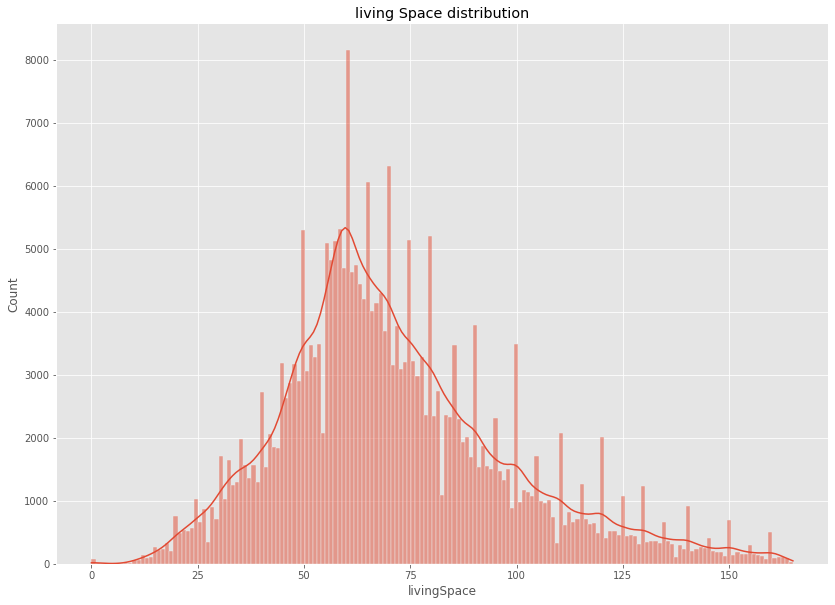

In [93]:
#distribution of living space
plot_distribiution(living_space,"living Space")

In [ ]:
# space range analysis
# plot dist
livingSpaceRange_hist = np.histogram(dataset['livingSpaceRange'], bins=7)
plt.figure(figsize=(10,7), dpi= 80)
plt.bar([1,2,3,4,5,6,7], height=livingSpaceRange_hist[0])
plt.plot([1,2,3,4,5,6,7],livingSpaceRange_hist[0], color='blue')
plt.title("livingSpaceRange distribution")
plt.show()

In [ ]:
livingSpaceRange_hist[1]

In [ ]:
dataset['livingSpaceRange'].value_counts()

In [ ]:
dataset['livingSpaceRange'].isna().sum()

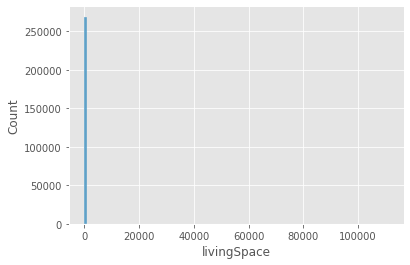

In [71]:
sns.histplot(data=living_space, bins= 100)

In [ ]:
sns.displot(data= living_space, kde= True)

##baserentrage

In [ ]:
baserentrage = dataset['baseRentRange']

In [ ]:
baserentrage

0         4
1         5
2         6
3         2
4         5
         ..
268845    6
268846    6
268847    5
268848    6
268849    6
Name: baseRentRange, Length: 268850, dtype: int64

In [ ]:
baserentrage.describe()

count    268850.000000
mean          3.765256
std           2.214357
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: baseRentRange, dtype: float64

In [ ]:
baserentrage.value_counts()

2    54546
1    48225
5    38000
3    37138
7    27495
4    25808
6    24210
8     8251
9     5177
Name: baseRentRange, dtype: int64

In [ ]:
baserentrage.isnull().sum()

0

## service charge

In [ ]:
#service charge
service_charge_uncleaned = pd.DataFrame(dataset['serviceCharge'], columns=['serviceCharge'])
service_charge_nulls = service_charge_uncleaned.isna()


# remove nulls 
service_charge = service_charge_uncleaned.dropna()


print(f"""size of original service charge is {service_charge_uncleaned.count()}\nthis contain {service_charge_nulls.sum()} number of null values and after deletation, {service_charge.isna().sum()} nan value were left.""")

size of original service charge is serviceCharge    260476
dtype: int64
this contain serviceCharge    8374
dtype: int64 number of null values and after deletation, serviceCharge    0
dtype: int64 nan value were left.


In [ ]:
service_charge.describe()

,serviceCharge
count,260476.000000
mean,151.227205
std,309.093976
min,0.000000
25%,95.000000
50%,135.000000
75%,190.000000
max,146118.000000


In [ ]:
# histogram of changes
service_charge_hist = np.histogram(service_charge,bins=260476)

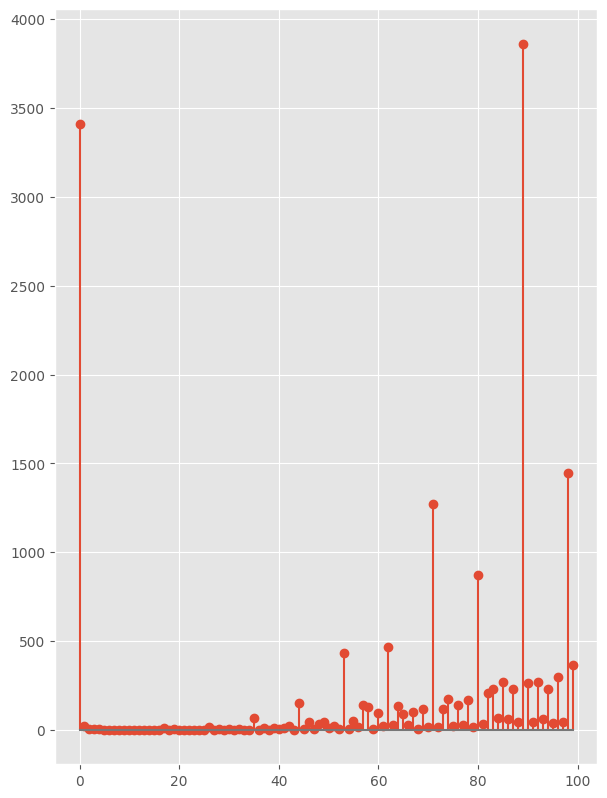

In [ ]:
plt.figure(figsize=(7,10), dpi=100)
plt.stem(service_charge_hist[0][:100], use_line_collection=True)
plt.show()

In [ ]:
# normalize
service_charge_mormalize  = pd.DataFrame(prep.normalize(service_charge), columns=['serviceCharge'])

In [ ]:
service_charge_mormalize.describe()

,serviceCharge
count,260476.000000
mean,0.986916
std,0.113634
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


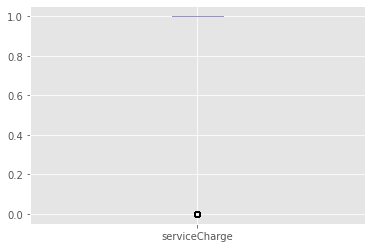

In [ ]:
sns.boxplot()

In [ ]:
# box plot
service_charge_df = pd.DataFrame(service_charge, columns=['service charge'])
service_charge_df.boxplot(column='service charge')
plt.show()

In [ ]:
service_charge_df = pd.DataFrame(service_charge, columns=['service charge'])

service_charge_df.plot.box()

TypeError: ignored

## pricetrend

In [ ]:
price_trent = dataset['pricetrend']

In [ ]:
price_trent.describe()

count    267018.000000
mean          3.389001
std           1.964874
min         -12.330000
25%           2.000000
50%           3.390000
75%           4.570000
max          14.920000
Name: pricetrend, dtype: float64

## haskitchen

In [ ]:
haskitchen = dataset['hasKitchen']

In [ ]:
haskitchen.isna().sum()

0

In [ ]:
haskitchen.value_counts()

False    176794
True      92056
Name: hasKitchen, dtype: int64

## garden

In [ ]:
garden = dataset['garden']

In [ ]:
garden

0          True
1         False
2         False
3         False
4         False
          ...  
268845    False
268846    False
268847     True
268848    False
268849    False
Name: garden, Length: 268850, dtype: bool

In [ ]:
garden.isna().sum()

0

In [ ]:
garden.describe()

count     268850
unique         2
top        False
freq      216093
Name: garden, dtype: object

## number of rooms

In [ ]:
numberofrooms = dataset['noRooms']

In [ ]:
numberofrooms.isna().sum()

0

In [ ]:
numberofrooms

0         4.0
1         3.0
2         3.0
3         3.0
4         3.0
         ... 
268845    3.0
268846    3.5
268847    4.0
268848    2.0
268849    3.0
Name: noRooms, Length: 268850, dtype: float64

In [ ]:
numberofrooms.value_counts()

3.0      92089
2.0      89038
1.0      27805
4.0      27776
2.5       9583
         ...  
99.0         1
140.0        1
200.0        1
1.2          1
79.0         1
Name: noRooms, Length: 64, dtype: int64

In [ ]:
numberofrooms.describe()

count    268850.000000
mean          2.641261
std           2.633440
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max         999.990000
Name: noRooms, dtype: float64

## livingspace
---

Challenges:


*  minumum space for people should be more than $9m^2$. so rooms with smaller size should replaced price. To solve this issue, we replace house size with average "totalRent" in that area "regio1+regio2" which houses has almost same price.
*   Outlier house sizes should be removed 



In [ ]:
living_space = dataset['livingSpace']



In [ ]:
living_space.isna().sum()

0

In [ ]:
living_space.describe()

count    268850.000000
mean         74.355548
std         254.759208
min           0.000000
25%          54.000000
50%          67.320000
75%          87.000000
max      111111.000000
Name: livingSpace, dtype: float64

In [ ]:
living_space

0          86.00
1          89.00
2          83.80
3          58.15
4          84.97
           ...  
268845     90.00
268846    115.00
268847     95.00
268848     70.00
268849     77.00
Name: livingSpace, Length: 268850, dtype: float64

## missing value in  totalrent

In [94]:
totalrent = dataset['totalRent']

In [ ]:
totalrent.isna().sum()

40517

In [95]:
null_total_rents = dataset[dataset["totalRent"].isna()]

In [120]:
other_info = null_total_rents[['baseRent', 'livingSpace', 'regio2']]

In [121]:
other_info = other_info[other_info['baseRent']<2000]
other_info = other_info[other_info['livingSpace']<250]


In [122]:
other_info.describe()

,baseRent,livingSpace
count,39536.000000,39536.000000
mean,612.841267,74.876445
std,363.211940,30.237656
min,0.000000,0.000000
25%,349.000000,56.000000
50%,495.000000,70.000000
75%,780.000000,90.000000
max,1998.000000,247.230000


In [140]:
list(cities.index)

['Chemnitz',
 'Leipzig',
 'Dresden',
 'Essen',
 'Duisburg',
 'Mittelsachsen_Kreis',
 'Halle_Saale',
 'Dortmund',
 'Berlin',
 'Wuppertal',
 'Recklinghausen_Kreis',
 'Düsseldorf',
 'Gelsenkirchen',
 'Märkischer_Kreis',
 'Frankfurt_am_Main',
 'Köln',
 'Bochum',
 'Hagen',
 'Wilhelmshaven',
 'Nürnberg',
 'Hamburg',
 'Zwickau',
 'Meißen_Kreis',
 'Bremen',
 'Magdeburg',
 'Mönchengladbach',
 'Mettmann_Kreis',
 'Herne',
 'München',
 'Bielefeld',
 'Mansfeld_Südharz_Kreis',
 'Leipzig_Kreis',
 'Burgenlandkreis',
 'Kassel',
 'Wiesbaden',
 'Lippe_Kreis',
 'Borken_Kreis',
 'Hannover',
 'Ennepe_Ruhr_Kreis',
 'Main_Kinzig_Kreis',
 'Kleve_Kreis',
 'Rhein_Sieg_Kreis',
 'Mannheim',
 'Wesel_Kreis',
 'Kaiserslautern',
 'Stuttgart',
 'Oldenburg_Oldenburg',
 'Krefeld',
 'Neubrandenburg',
 'Bonn',
 'Goslar_Kreis',
 'Hannover_Kreis',
 'Stadtverband_Saarbrücken_Kreis',
 'Trier',
 'Braunschweig',
 'Greiz_Kreis',
 'Wittenberg_Kreis',
 'Unna_Kreis',
 'Viersen_Kreis',
 'Oberbergischer_Kreis',
 'Mülheim_an_der_Ruhr',

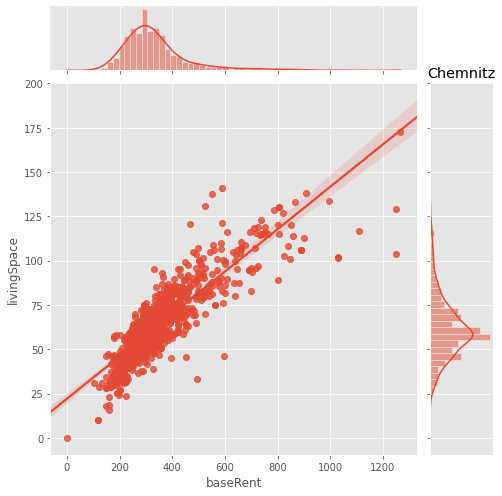

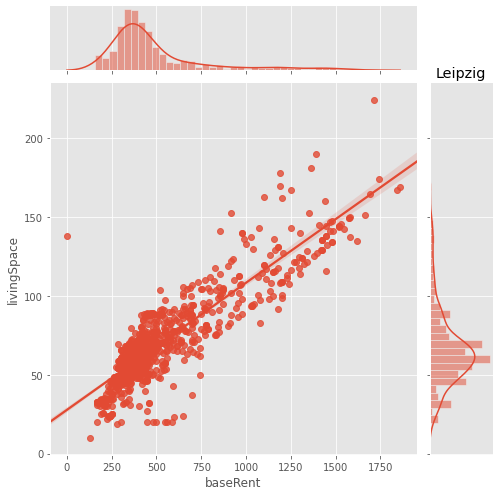

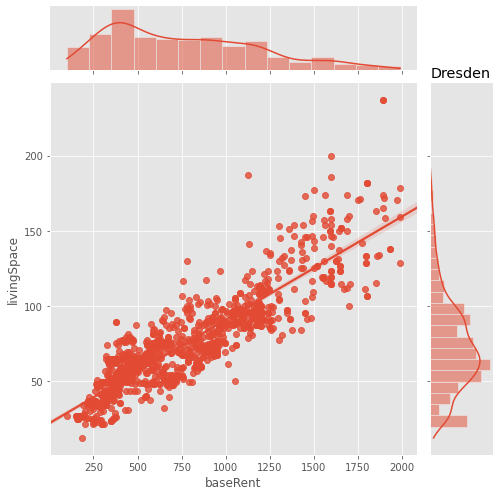

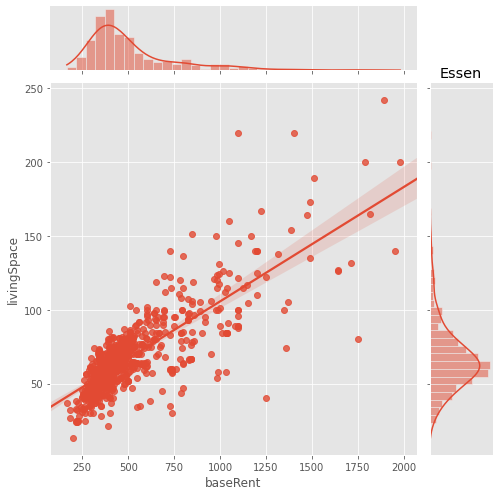

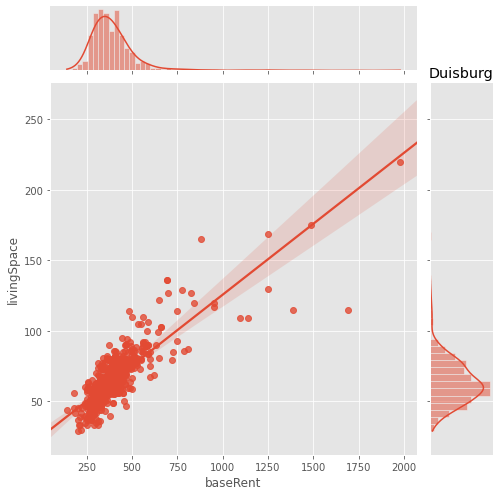

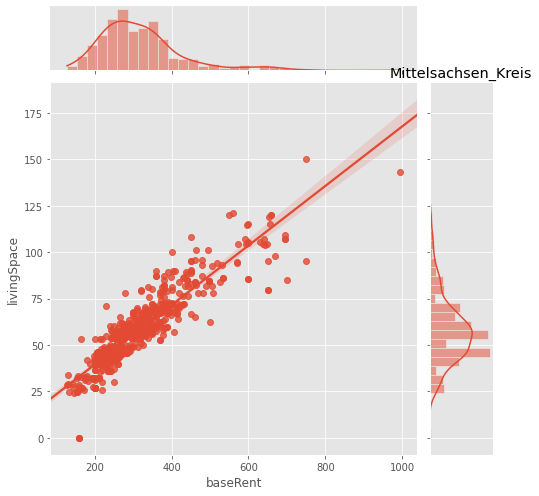

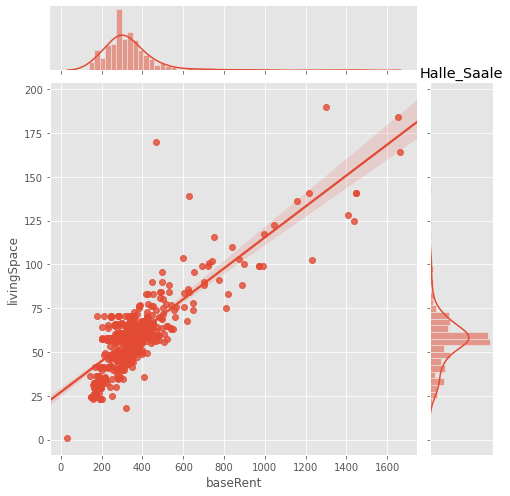

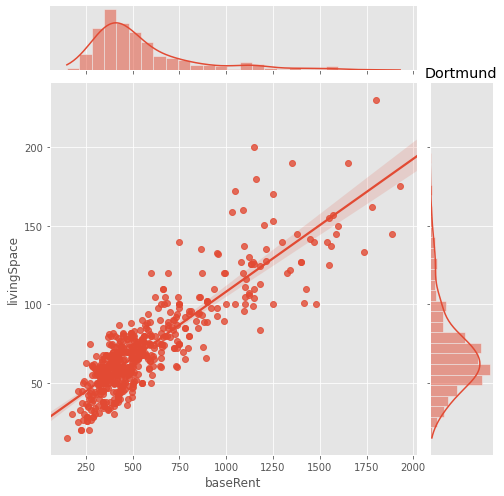

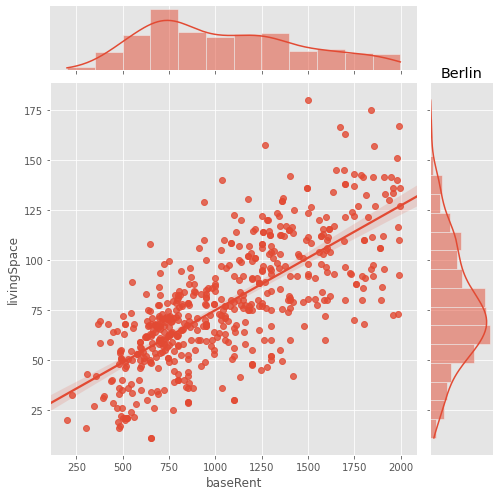

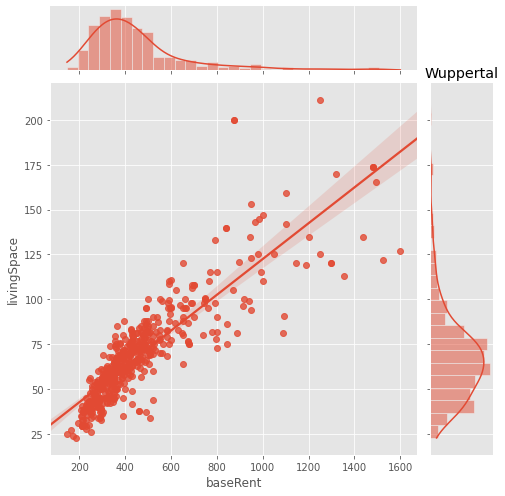

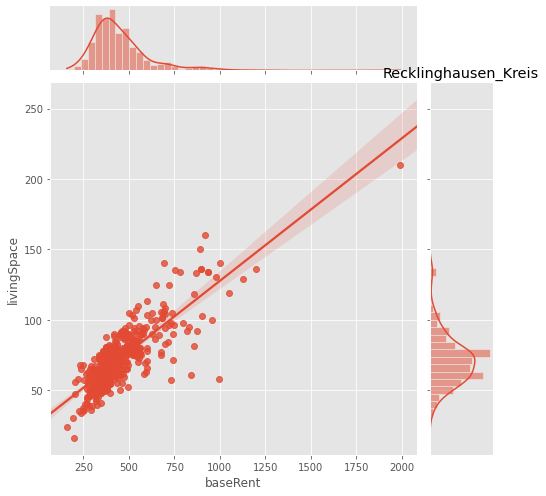

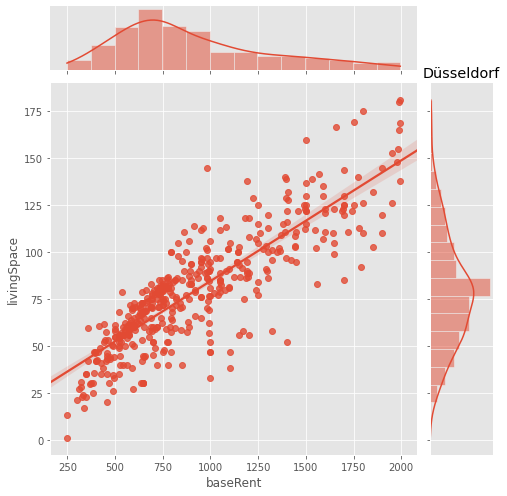

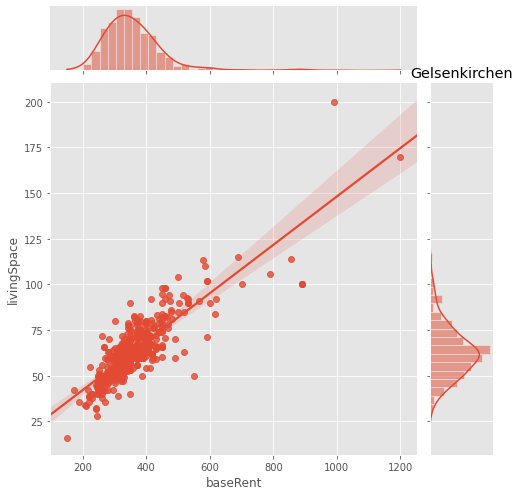

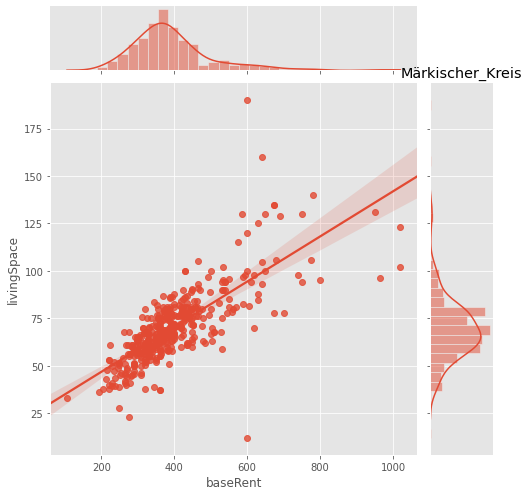

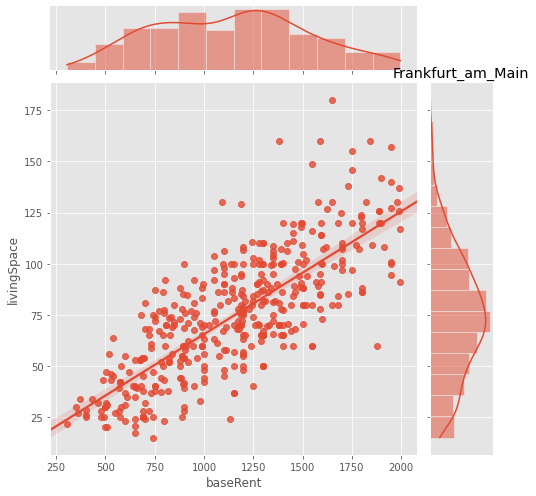

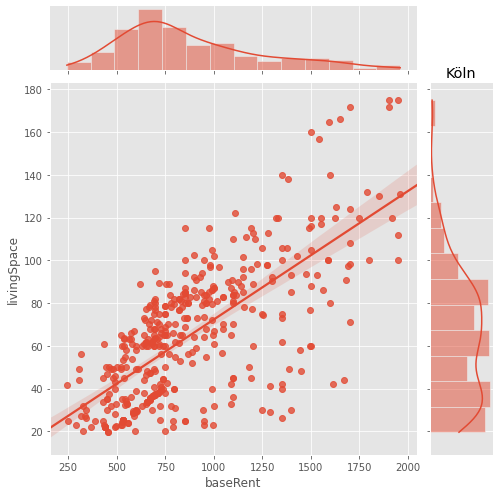

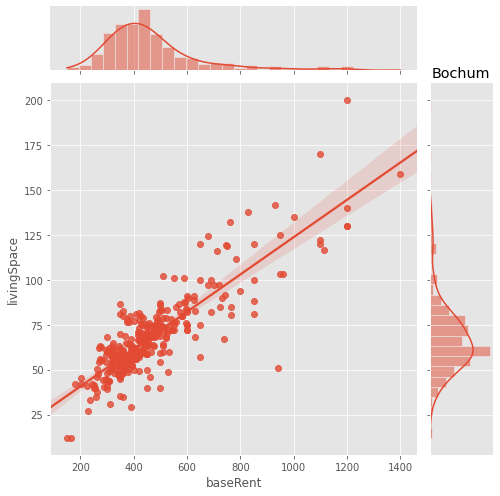

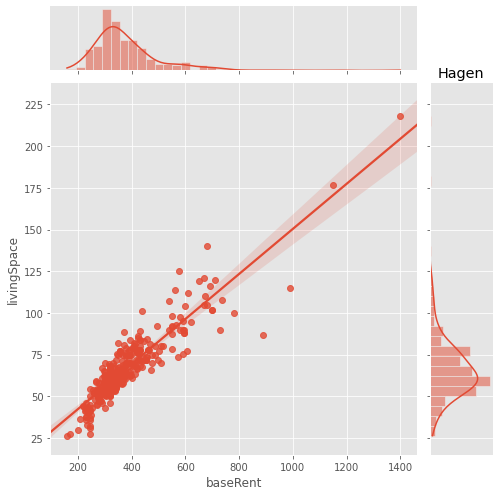

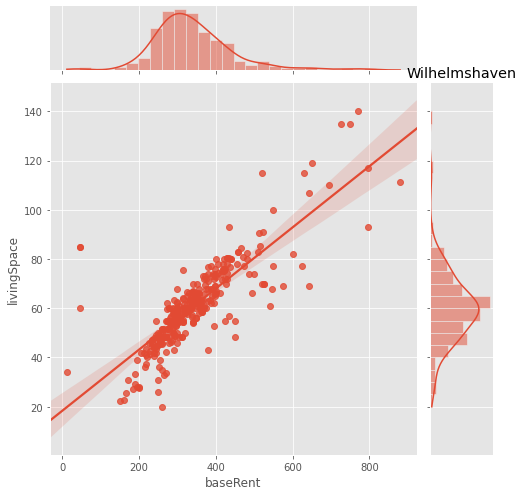

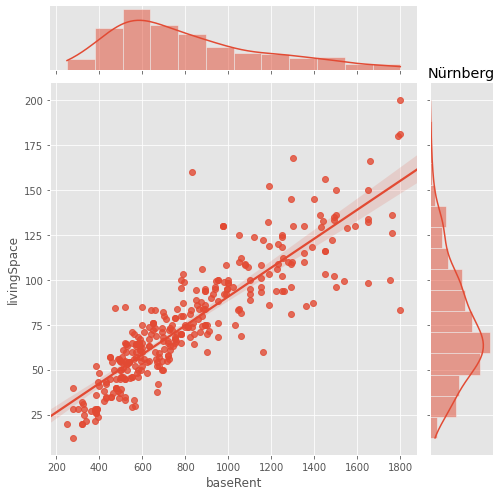

In [143]:
# House with empty totalRent which has to estimate 
cities = list(other_info['regio2'].value_counts().index)
for city in cities[0:20]:
  g = sns.jointplot(x='baseRent', y='livingSpace', data= other_info[other_info['regio2']==city],
                kind="reg", truncate=False,
                height=7)
  plt.title(city)

In [ ]:
# find regions of houses with total rent of null value
region_null_total_rents = null_total_rents["regio2"]

In [ ]:
null_total_rents["regio2"].value_counts()

Chemnitz                         1187
Dresden                          1154
Leipzig                          1143
Essen                             741
Berlin                            662
                                 ... 
Odenwaldkreis                       2
Weißenburg_Gunzenhausen_Kreis       2
Freyung_Grafenau_Kreis              2
Frankfurt_Oder                      2
Hildburghausen_Kreis                1
Name: regio2, Length: 418, dtype: int64

In [ ]:
print(null_total_rents[null_total_rents["regio2"] == "Hildburghausen_Kreis"]['livingSpace'])

261866    92.94
Name: livingSpace, dtype: float64


### compare total rent and living space

In [ ]:
living_space_total_rent = dataset[['livingSpace', 'totalRent', 'regio2']]

In [ ]:
# remove null values 
living_space_total_rent = living_space_total_rent[living_space_total_rent['totalRent'].notna()]

In [ ]:
# remove outlier data
living_space_total_rent = living_space_total_rent[living_space_total_rent['totalRent']<6e3] # remove total price outliers
living_space_total_rent = living_space_total_rent[living_space_total_rent['livingSpace']<3.5e2]

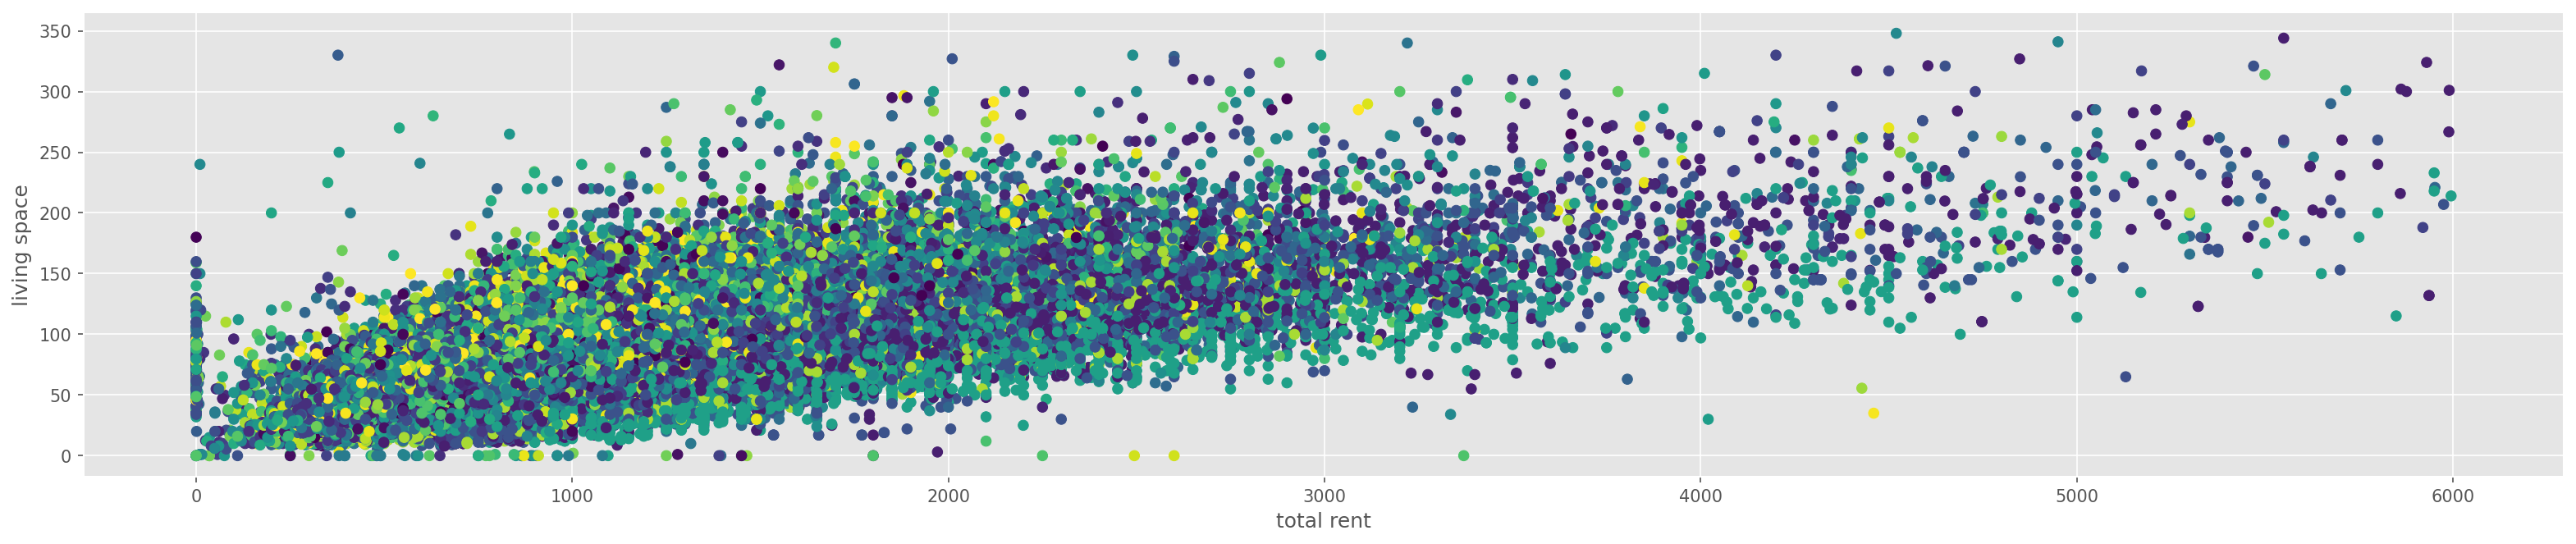

In [ ]:
fig = plt.figure(figsize = (26,5), dpi = 150)
plt.scatter(living_space_total_rent['totalRent'], living_space_total_rent['livingSpace'],
            c= living_space_total_rent.regio2.astype('category').cat.codes )
plt.xlabel('total rent')
plt.ylabel('living space')
plt.show()

## correlate all features

In [ ]:
f, ax = plt.subplots(figsize=(26, 24), dpi=150)

sns.heatmap(dataset.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

# pre processing

* handle outliere data
* remove features with lots of missing (drop cols)
* dealing with missing data

In [ ]:
dataset['date']

0         May19
1         May19
2         Oct19
3         May19
4         Feb20
          ...  
268845    Feb20
268846    May19
268847    Feb20
268848    May19
268849    Feb20
Name: date, Length: 268850, dtype: object

In [ ]:
cols=  dataset.columns
print(cols)

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')


In [ ]:
# concat address columns
address = dataset['regio1'] + dataset['regio2'] + dataset['regio3']
# replace adreess and drop address
dataset.insert(0, "address", address)

In [ ]:
def create_dataset(original_dataset:pd.DataFrame, required_cols:list)->pd.DataFrame:
  
  new_dataframe = original_dataset[required_cols]

  return new_dataframe

In [ ]:
required_cols = ['address','totalRent', 'scoutId' ]
new_dataset = create_dataset(dataset, required_cols)

In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115047 entries, 2 to 268847
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    115047 non-null  object 
 1   totalRent  115047 non-null  float64
 2   scoutId    115047 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
# connect dataset to 
classes = new_dataset['address'].value_counts()
classes

SachsenChemnitzSonnenberg                                   1742
SachsenChemnitzKaßberg                                      1602
SachsenChemnitzHilbersdorf                                  1236
SachsenChemnitzSchloßchemnitz                               1199
Sachsen_AnhaltSaalekreisMerseburg                            868
                                                            ... 
Rheinland_PfalzBitburg_Prüm_KreisEchternacherbrück             1
BayernWunsiedel_im_Fichtelgebirge_KreisBad_Alexandersbad       1
Schleswig_HolsteinSchleswig_Flensburg_KreisNeuberend           1
BrandenburgSpree_Neiße_KreisTschernitz                         1
BayernWeilheim_Schongau_KreisEberfing                          1
Name: address, Length: 8813, dtype: int64

In [ ]:
# remove low data classes
classes = classes[classes > 100]
classes = list(classes.index)
classes

In [ ]:
# update dataset with valid values 
new_dataset = new_dataset[new_dataset['address'].isin(classes)] # challenge: .isin

In [ ]:
# filter dataset based on regio2 
def regional_based_class(based_dataset:pd.DataFrame, filter='regio2') -> dict:
  
  # remove nans
  # new_dataset['regio2'].eq('').sum()

  # extract classes
  vlaues = dataset[filter].values
  
  classes = {}

  for cls in vlaues:
    classes.update({cls:based_dataset[based_dataset[filter]==cls]})
  
  return classes

In [ ]:
data_classes = regional_based_class(new_dataset)

* تجمیع داده های کم با داده های نزدیک تر و بزرگتر.
* ایجاد داده های بزرگتر و مهندسی ویژگی
---

* افزودن ویژگی موقعیت جغرافیایی و کلاسترینگ داده ها. 

In [ ]:
#splite tarin and test dataset
